Назва дисципліни: Обробка та аналіз біомедичних даних


Група: БС-83

Студент: Каліновська Б.В.

Лабораторна робота №3

Тема: Візуалізація даних за допомогою бібліотеки Seaborn

Імпортування:

In [2]:
import seaborn as sns
%matplotlib inline

Збереження даних 

In [16]:
flights = sns.load_dataset('flights')

In [20]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


Візуалізація даних

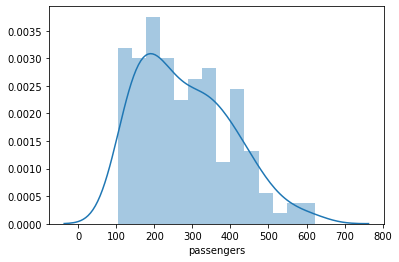

In [33]:
#displot - показує розподіл одновимірного набору спостережень
#kde - за замовчуванням True, якщо kde=False - то на графіку буде лише гістограма без кривої розподілу
#bins - ширина "кроку" для гістограми
sns.distplot(flights['passengers'], bins=14)

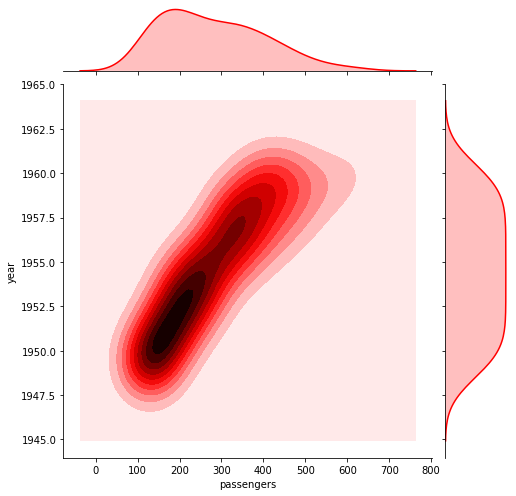

In [54]:
#Функція joinplot() дозволяє співставити розподіл двох змінних та їх взаємозв’язок за допомогою діаграми розсіювання
#kind{ “scatter” | “reg” | “resid” | “kde” | “hex” } (необов'язковий) - варіант діаграми розсіювання.
#color (необов'язковий) - колір
#height(необов'язковий) - розмір фігури

sns.jointplot(x='passengers', y='year', data = flights, kind="kde", color="r", height = 7)

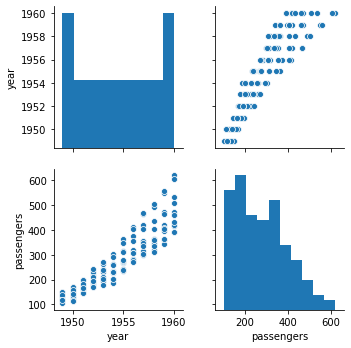

In [56]:
#pairplot – будує попарні взаємозв’язки між змінними в повному наборі даних
#По діагоналі відображені графіки розподілу даних, в інших комірках - діаграми розсіювання (для відображення взаємозв’язку між двома змінними)

sns.pairplot(flights)

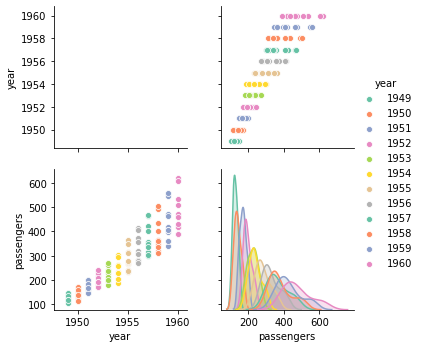

In [71]:
#hue – вибір категоріальної змінної для розділення даних на окремі підгрупи та для їх кольорового відображення на діаграмі
#palette - кольорова схема для візуалізації

sns.pairplot(flights, hue='year', palette='Set2')

Графіки для аналізу категоріальних даних

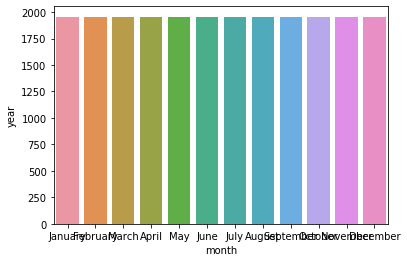

In [131]:
#barplot - дозволяють отримувати сукупні дані по кількісним даним в залежності від категоріальної змінної

sns.barplot(x = 'month', y = 'year', data = flights)

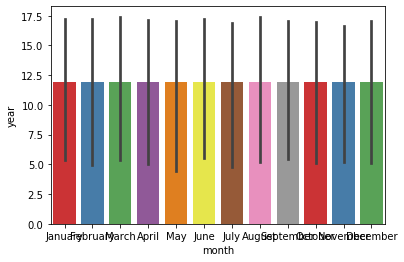

In [138]:
#estimator – зміна варіанту відображення кількісної змінної. Даному параметру можна призначити як власні функції, так і функції з різних бібліотек
# var() - обчислює дисперсію значень елементів масива 

import numpy as np
sns.barplot(x = 'month', y = 'year', data = flights, estimator = np.var, palette = 'Set1')

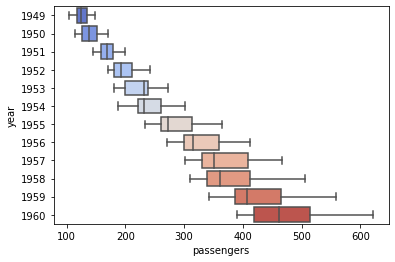

In [139]:
#boxplots - використовується для візуалізації розподілу категоріальних даних за певною кількісною змінною
#orient - орієнтація ділянки (вертикальна 'v' або горизонтальна 'v')

sns.boxplot(x = 'passengers', y = 'year', data = flights, orient='h', palette = 'coolwarm')

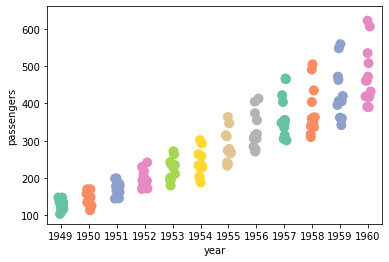

In [164]:
#stripplot - представляє собою діаграму розсіювання
#size(необов'язковий) - радіус маркерів, у балах

sns.stripplot(x = 'year', y = 'passengers', data = flights, size = 10, palette = 'Set2' )

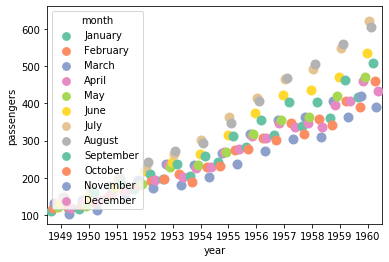

In [169]:
#dodge – додається лише за умови вибору параметру hue. За замовчуванням False, дозволяє розділити групи при візуалізації
#jitter - корисно використовувати, коли у нас багато точок, і вони перекриваються, для того щоб побачити розподіл, величина jitter - це половина ширини рвномірно випадкової величини або можна використовувати True для хорошого значення за замовчуванням

sns.stripplot(x='year', y='passengers', hue='month', data=flights, dodge=True, jitter=True, size=10, palette='Set2')

Графіки для аналізу взаємозв'язку даних

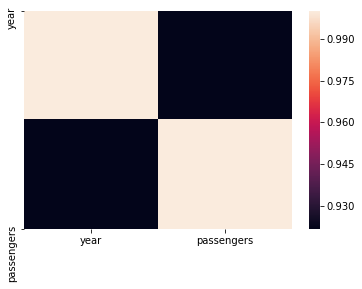

In [171]:
#heatmap – графік взаємозв’язку (кореляції) між даними у вигляді матриці. Для побудови даного графіку необхідно попередньо розрахувати матрицю кореляцій між змінними ( .corr)

sns.heatmap(flights.corr())

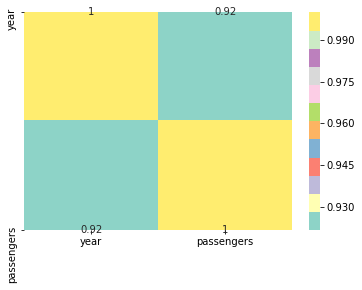

In [196]:
#cmap - відображує значення даних у кольоровому простщрі. Якщо це не передбачено, значення за замовчуванням залежатиме від того, чи встановлено центр
#annot - якщо annot = True записуються значення даних у кожну клітинку (annot – додавання коефіцієнтів кореляції на діаграму)

sns.heatmap(flights.corr(), cmap = 'Set3', annot = True)

Графіки для відображення даних у вигляді сітки

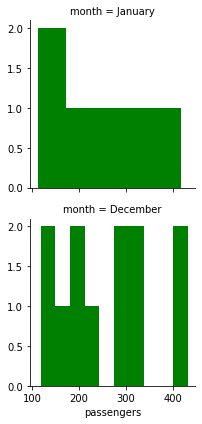

In [219]:
#FaceGrid -дозволяє візуалізувати спільний розподіл окремих ознак деяких змінних
#(row, col, hue)_order - щоб контролювати порядок рівнів цієї змінної

import matplotlib.pyplot as plt
b = sns.FacetGrid(flights, row = 'month', row_order = ['January','December'])
b = b.map(plt.hist, 'passengers', color = 'g')

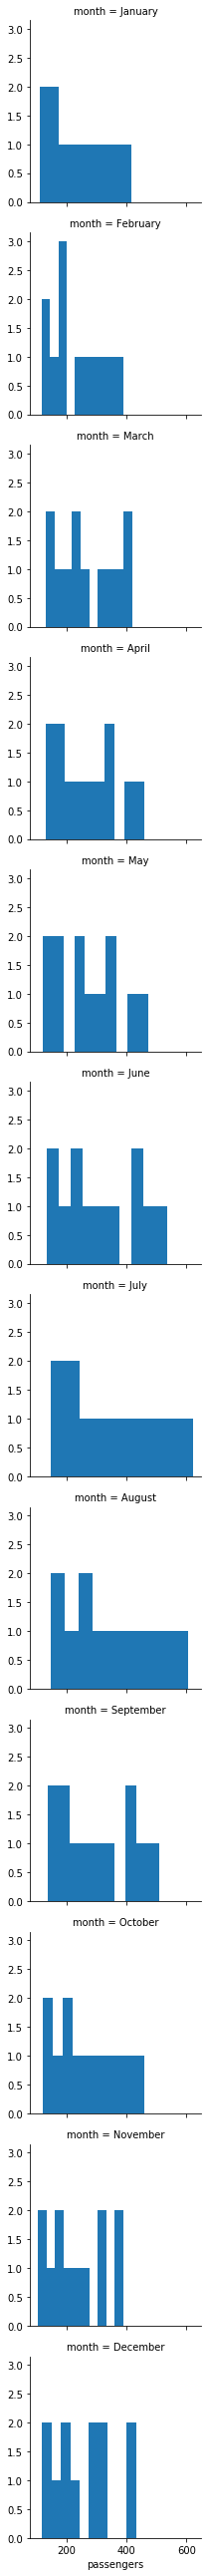

In [220]:
c = sns.FacetGrid(flights,  row = "month")
c = c.map(plt.hist, "passengers")

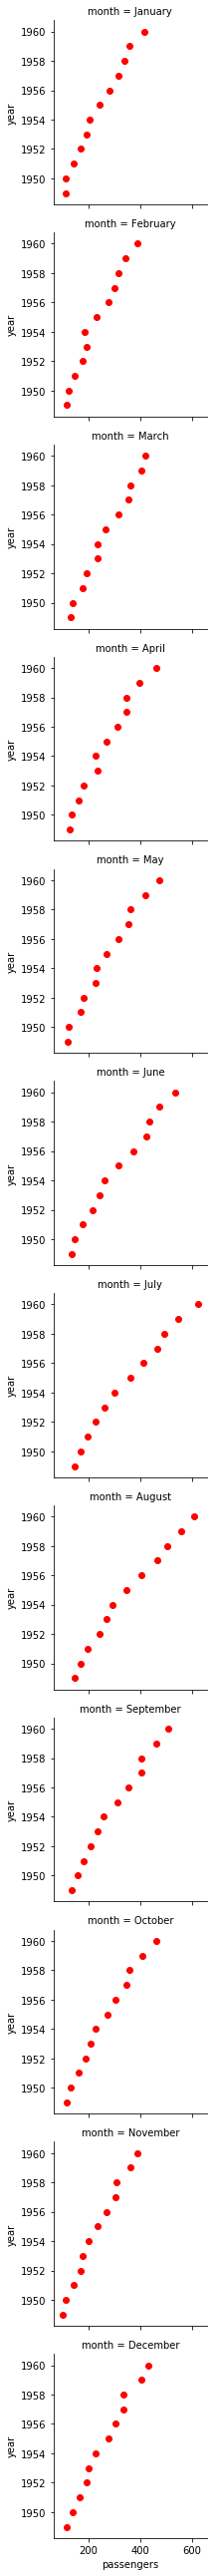

In [221]:
#add_legend() - додавання легенди до діаграми

n = sns.FacetGrid(flights, row = "month")
n = n.map(plt.scatter, "passengers", "year", color = 'r').add_legend()